# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [50]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [51]:
def imageGenerator(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            image[x, y] = 1
    return image

In [52]:
def imageGeneratorBspline(x1, x2, y1, y2):
    image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            y += x 
            if x>99 or y>99:
                pass
            else:
                image[x, y] = 1
    return image

In [ ]:
def imageGeneratorLarge(x1, x2, y1, y2):
    image = np.zeros([1000, 1000], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            image[x, y] = 1
    return image

## Rigid Test

In [53]:
# Create rigid transformed test images
fixed_image = imageGenerator(25,75,25,75)
moving_image = imageGenerator(1,51,10,60)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

In [54]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Rigid Test

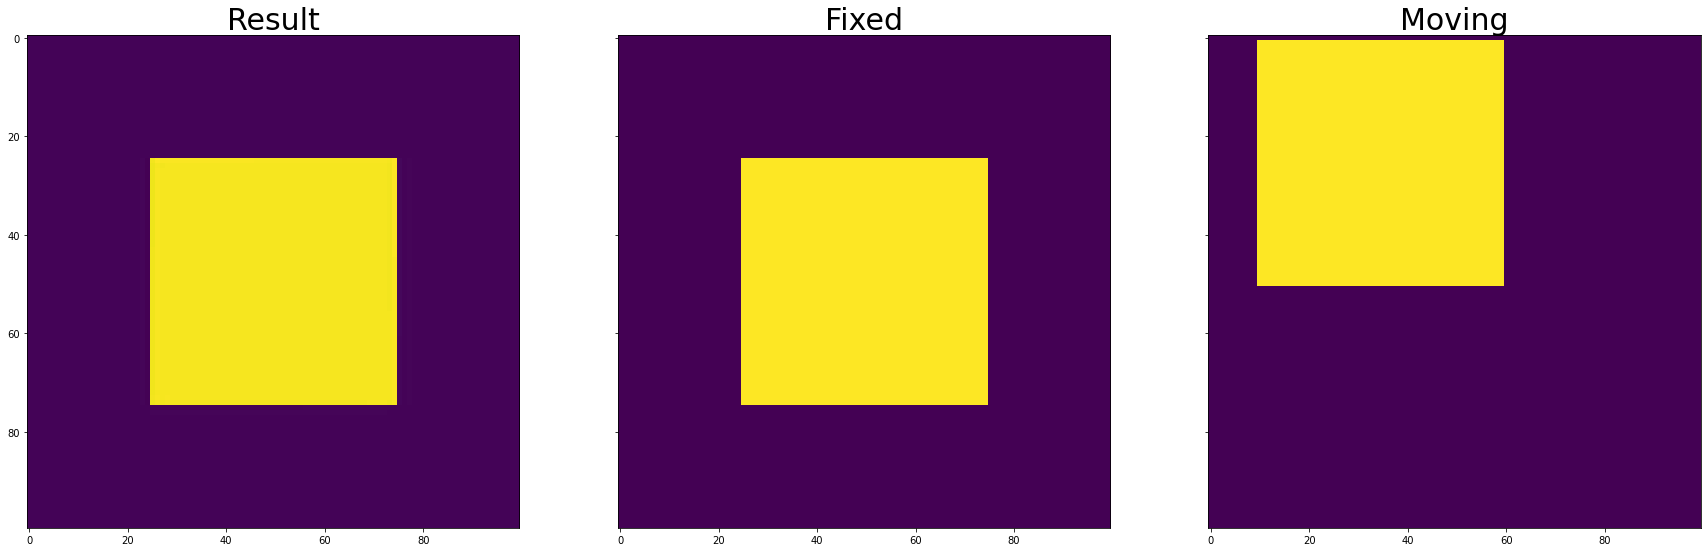

In [55]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Affine Test

In [56]:
# Create test images
fixed_image_affine = imageGenerator(25,75,25,75)
moving_image_affine = imageGenerator(1,71,1,91)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine',4)
parameter_object.AddParameterMap(default_affine_parameter_map)

In [57]:
# Call registration function
result_image_affine, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_affine, moving_image_affine,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Affine Test

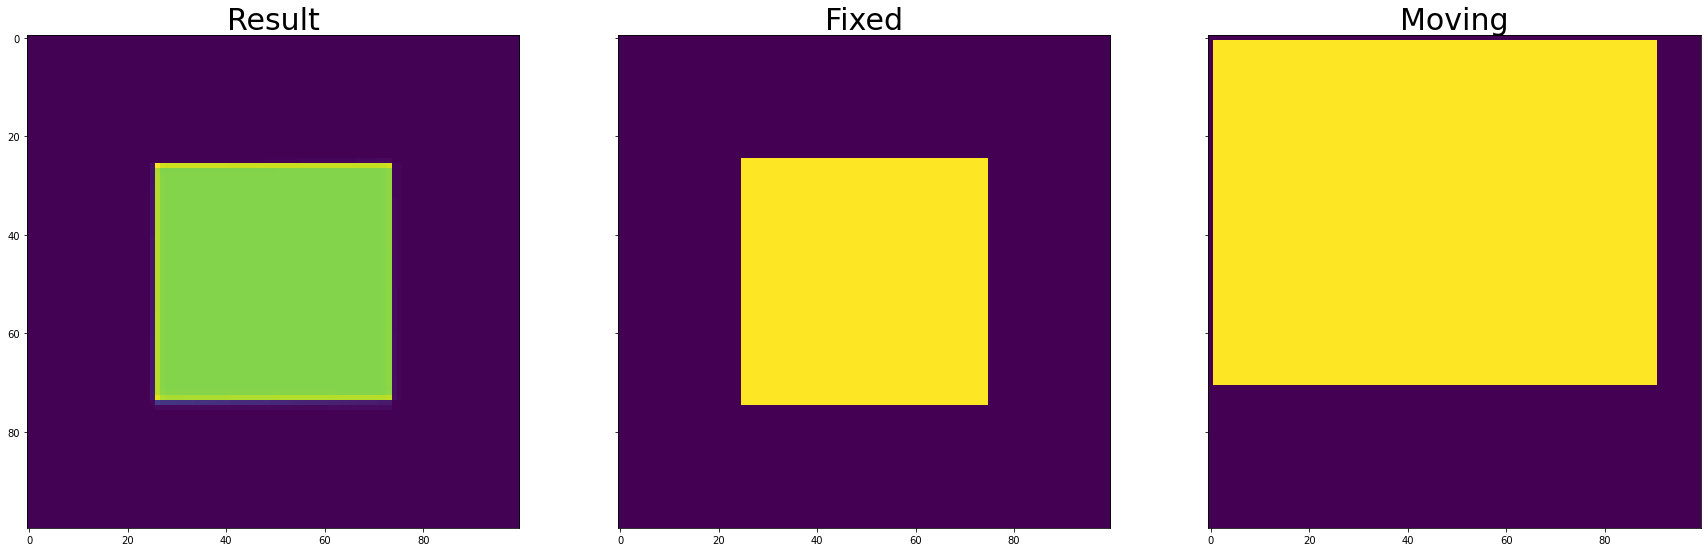

In [58]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_affine)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_affine)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_affine)
axs[2].set_title('Moving', fontsize=30)
plt.show()

## Bspline Test

In [11]:
# Create test images
fixed_image_bspline = imageGenerator(25,65,25,65)
moving_image_bspline = imageGeneratorBspline(5,55,5,40)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_affine_parameter_map = parameter_object.GetDefaultParameterMap('affine')
parameter_object.AddParameterMap(default_affine_parameter_map)
default_bspline_parameter_map = parameter_object.GetDefaultParameterMap('bspline')
parameter_object.AddParameterMap(default_bspline_parameter_map)

In [12]:
# Call registration function
result_image_bspline, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_bspline, moving_image_bspline,
    parameter_object=parameter_object,
    log_to_console=True)

### Bspline Test Transformix

In [13]:
# Load Transformix Object
transformix_object = itk.TransformixFilter.New()

# Transformix is not working with numpy yet, so casting to itk image view required
moving_image_bspline = itk.image_view_from_array(moving_image_bspline)
transformix_object.SetMovingImage(moving_image_bspline)
transformix_object.SetTransformParameterObject(result_transform_parameters)

# Update object (required)
transformix_object.UpdateLargestPossibleRegion()

# Results of Transformation
result_image_transformix = transformix_object.GetOutput()


### Bspline Test Visualization

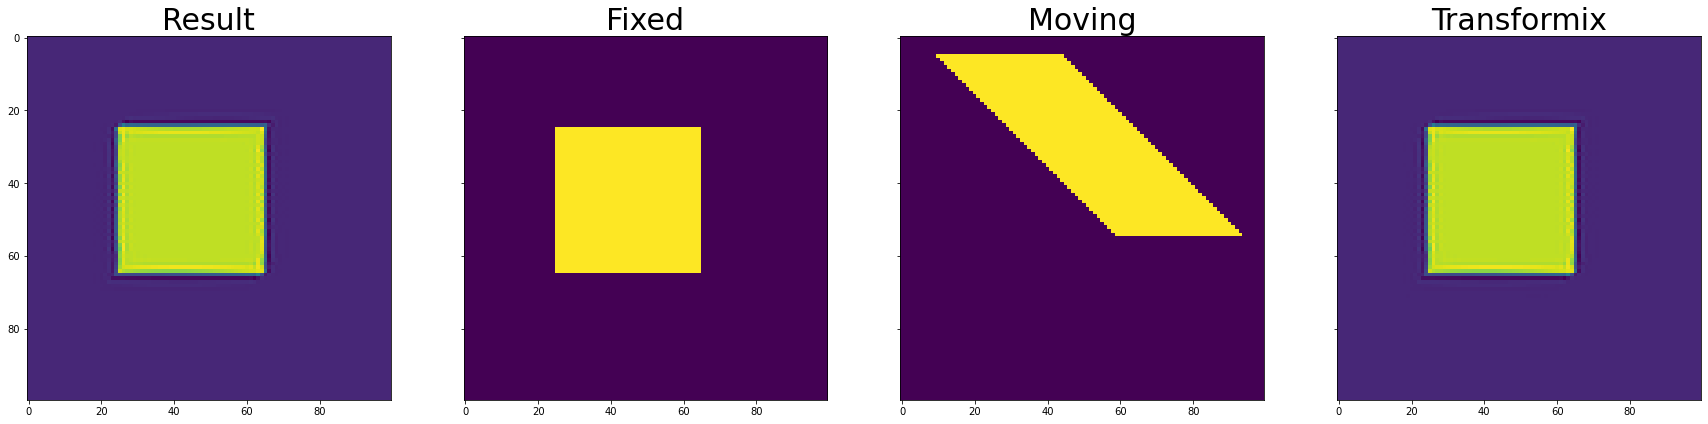

In [14]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,4, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_bspline)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image_bspline)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image_bspline)
axs[2].set_title('Moving', fontsize=30)
axs[3].imshow(result_image_transformix)
axs[3].set_title('Transformix', fontsize=30)
plt.show()

## Size transformation test
See example 12 for more explanation

In [133]:
# Create small images for registration
fixed_image_small = imageGenerator(25,75,25,75)
moving_image_small = imageGenerator(0,50,10,60)

# .. and a big moving image for transformation
moving_image_large = imageGeneratorLarge(0,500,100,600)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid',4)
parameter_object.AddParameterMap(default_rigid_parameter_map)
# parameter_map_rigid = parameter_object.GetDefaultParameterMap('affine', 5)
# parameter_object.AddParameterMap(parameter_map_rigid)

# Call elastix
result_image_small, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_small, moving_image_small,
    parameter_object=parameter_object)

# Adjust parameter file
result_transform_parameters.SetParameter("Size", ['1000', '1000'])
# result_transform_parameters.SetParameter("Spacing", ['1', '1'])
# result_transform_parameters.SetParameter("TransformParameters", ['-9.66114e-05', '-150.0125', '-250.0037'])

# Cast numpy moving image 
moving_image_large = itk.image_view_from_array(moving_image_large)

# Call transformix
# result_image_large = itk.transformix_filter(
#     moving_image=moving_image_large,
#     transform_parameter_object=result_transform_parameters,
#     log_to_console=False)


# Load Transformix Object
transformix_object = itk.TransformixFilter.New()
transformix_object.SetMovingImage(moving_image_large)
transformix_object.SetTransformParameterObject(result_transform_parameters)

# Update object (required)
transformix_object.UpdateLargestPossibleRegion()

# Results of Transformation
result_image_large = transformix_object.GetOutput()

# Cast itk image to numpy for visualization
result_image_large = np.asarray(result_image_large).astype(np.float32)

## Size transformation test visualization


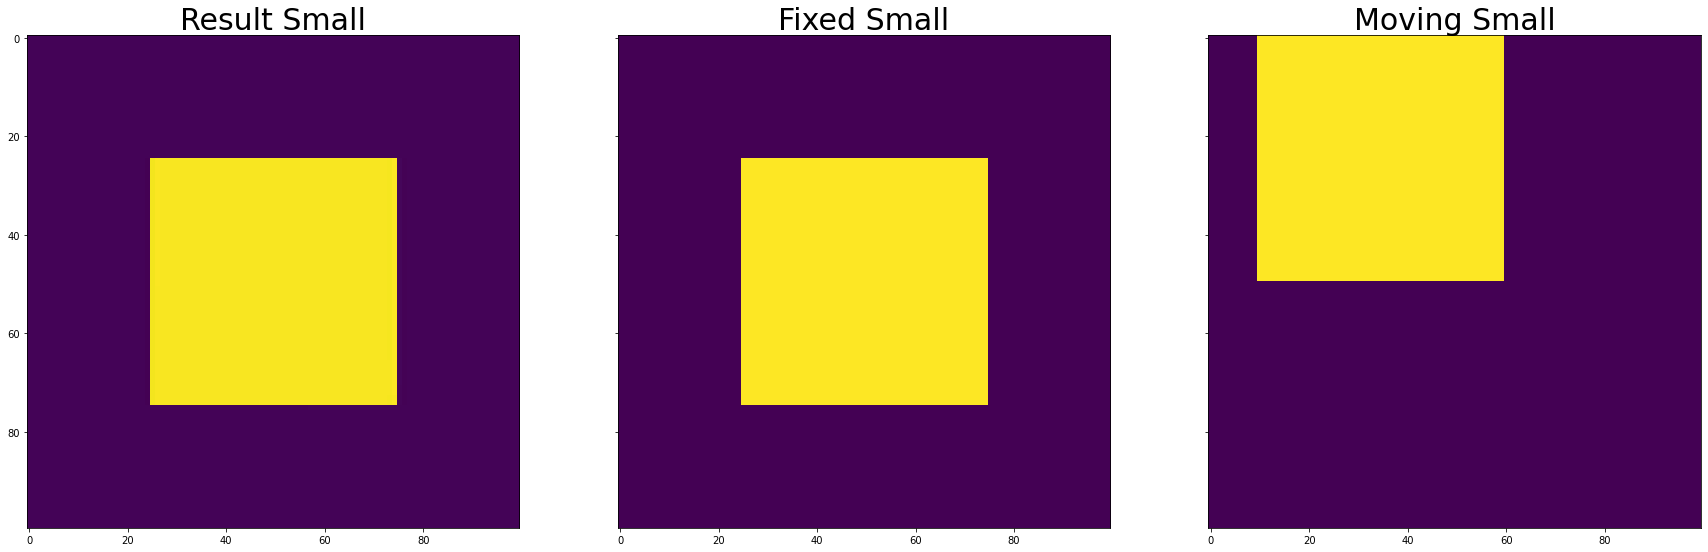

In [134]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_small)
axs[0].set_title('Result Small', fontsize=30)
axs[1].imshow(fixed_image_small)
axs[1].set_title('Fixed Small', fontsize=30)
axs[2].imshow(moving_image_small)
axs[2].set_title('Moving Small', fontsize=30)
plt.show()

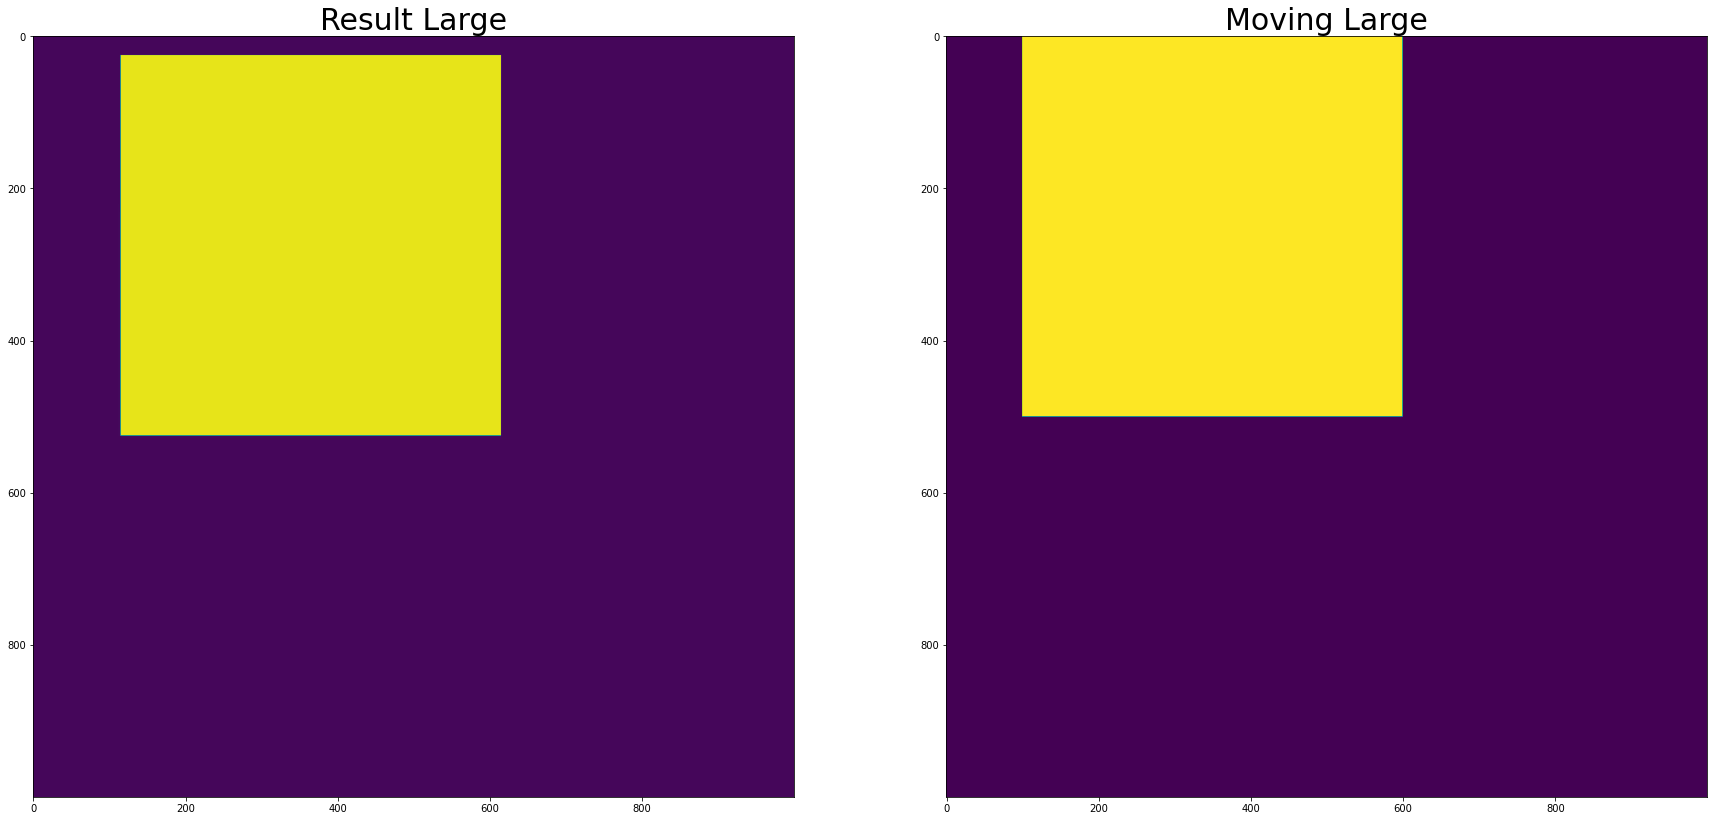

In [135]:
fig, axs = plt.subplots(1,2, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image_large)
axs[0].set_title('Result Large', fontsize=30)
axs[1].imshow(moving_image_large)
axs[1].set_title('Moving Large', fontsize=30)
plt.show()


## Result not as expected!